# *Counselors of Real Estate* Top Ten Issues
# MIXED MACROECONOMIC SIGNALS

## Timothy H. Savage, Ph.D. CRE
### NYU Schack Institute of Real Estate
### Chief Economist | Haystacks.AI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


<ipython-input-2-26f4d1252f13>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figzise" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('my_figure', format='png', dpi=300, figzise=(8,8))


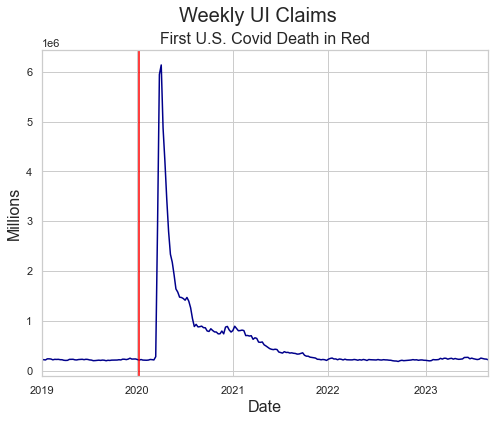

In [2]:
claims = fred.get_series("ICSA", observation_start='2019-01-01').dropna()
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Weekly UI Claims', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

# saving the plot locally
# maybe the format = 'svg' will be make it scalable for publishing but not sure
# dpi adjusts the dots=per-inch = plot resolution (too much will create a big file)
# figsize is the plot size in inches
# full documentation here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('my_figure', format='png', dpi=300, figzise=(8,8))

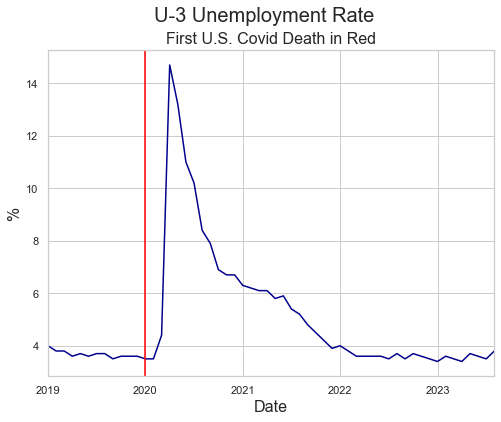

In [3]:
unrate = fred.get_series("UNRATE", observation_start='2019-01-01').dropna()
unrate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U-3 Unemployment Rate', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

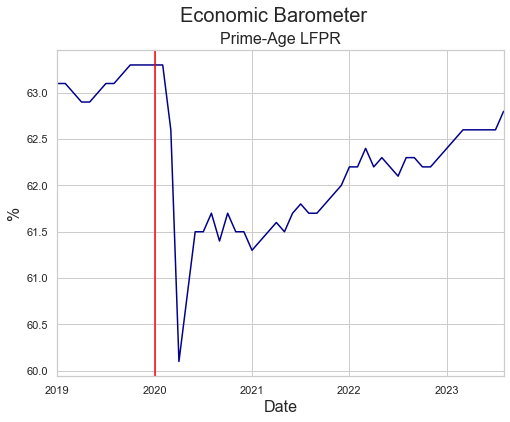

In [4]:
lfpr = fred.get_series("CIVPART", observation_start='2019-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Prime-Age LFPR', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

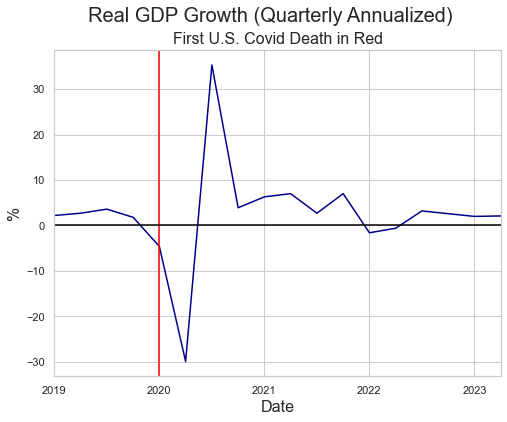

In [5]:
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2019-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Real GDP Growth (Quarterly Annualized)', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")
plt.axhline(0, color="black")

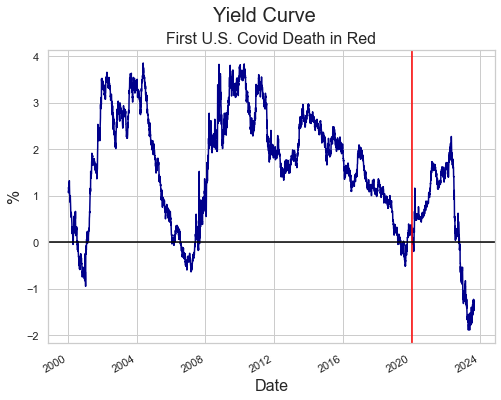

In [6]:
yield_curve = fred.get_series("T10Y3M", observation_start='2000-01-01').dropna()
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")
plt.axhline(0, color='black')

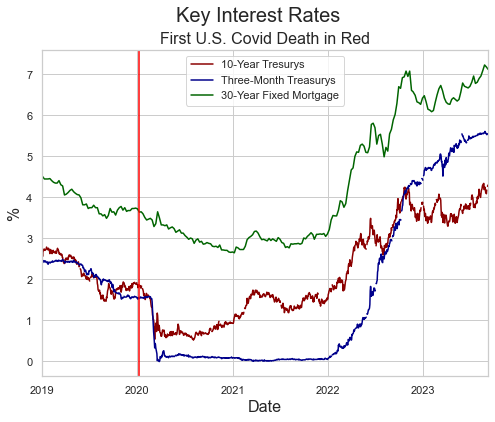

In [7]:
ten_year = fred.get_series("DGS10", observation_start='2019-01-01')
three_month = fred.get_series("DGS3MO", observation_start='2019-01-01')
ffr = fred.get_series("FEDFUNDS", observation_start='2019-01-01')
mortgage = fred.get_series("MORTGAGE30US", observation_start='2019-01-01')
yield_curve = fred.get_series("T10Y3M", observation_start='2019-01-01')

ten_year.plot(c='darkred', label='10-Year Tresurys', figsize=(8, 6), )
three_month.plot(color='darkblue', label='Three-Month Treasurys')
mortgage.plot(color='darkgreen', label='30-Year Fixed Mortgage')
plt.suptitle('Key Interest Rates', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

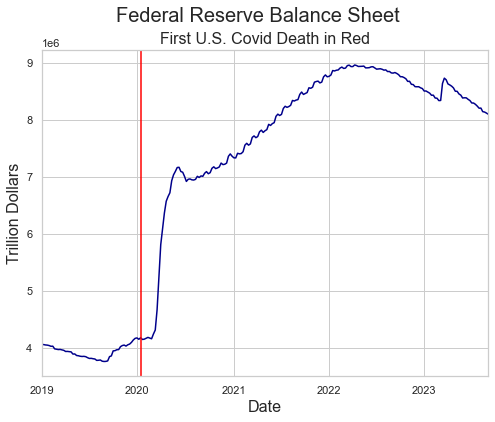

In [8]:
balance = fred.get_series("WALCL", observation_start='2019-01-01').dropna()
balance.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillion Dollars', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

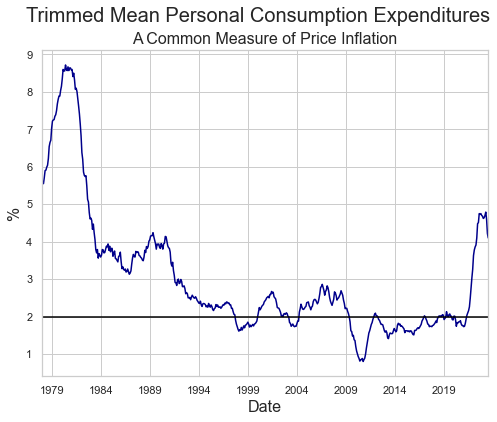

In [9]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL").dropna()
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Trimmed Mean Personal Consumption Expenditures', fontsize=20)
plt.title('A Common Measure of Price Inflation', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

In [10]:
df = {}
df['Durables'] = fred.get_series("PCEDG", observation_start='2019-01-01').dropna()
df['Non-Durables'] = fred.get_series("PCEND", observation_start='2019-01-01').dropna()
df = pd.DataFrame(df)
df = df.pct_change(periods=1).dropna() * 100

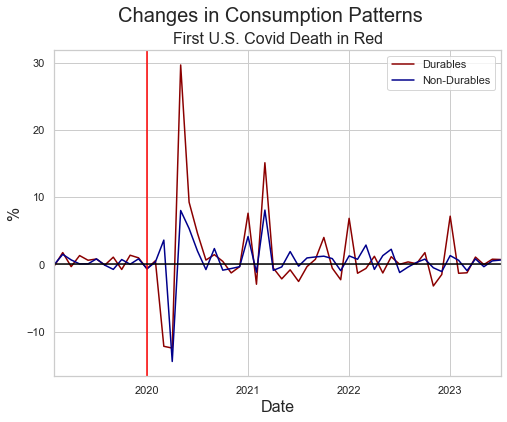

In [11]:
colors = (["darkred", "darkblue"])
df.plot(figsize=(8, 6), color = colors)
plt.suptitle('Changes in Consumption Patterns', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")
plt.axhline(0, color='black')

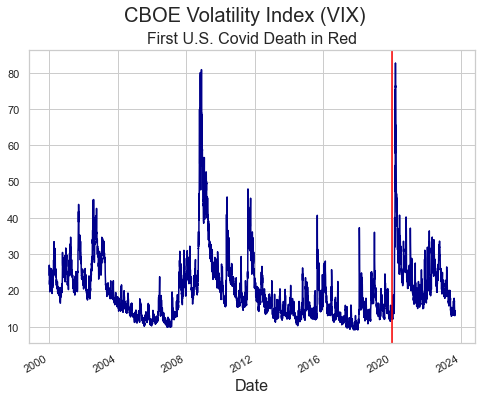

In [12]:
wilshire = fred.get_series("VIXCLS", observation_start='2000-01-01').dropna()
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('CBOE Volatility Index (VIX)', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

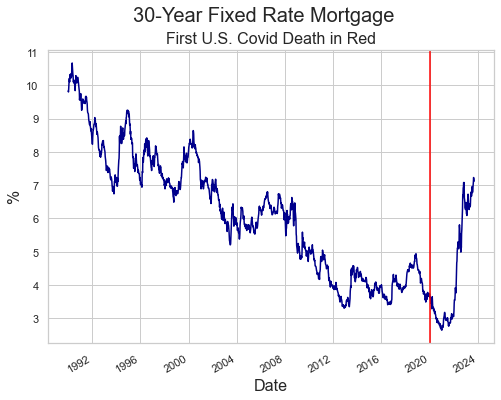

In [13]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
mortgage = fred.get_series("MORTGAGE30US", observation_start='1990-01-01')

mortgage.plot(color='darkblue', label='30-Year Fixed Mortgage', figsize=(8, 6), )
plt.suptitle('30-Year Fixed Rate Mortgage', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

Text(0, 0.5, 'Units in Thousands')

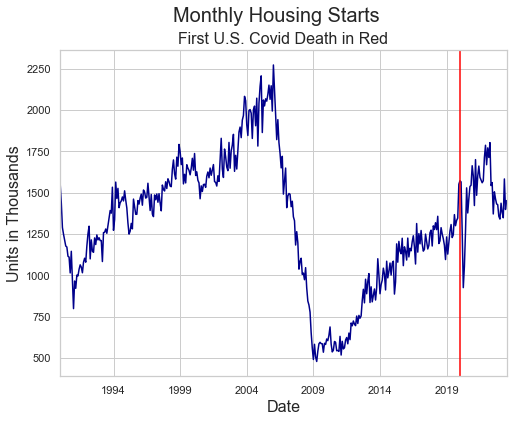

In [14]:
starts = fred.get_series("HOUST", observation_start='1990-01-01')

starts.plot(color='darkblue', label='Housing Starts', figsize=(8, 6), )
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")
plt.suptitle('Monthly Housing Starts', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Units in Thousands', fontsize=16)

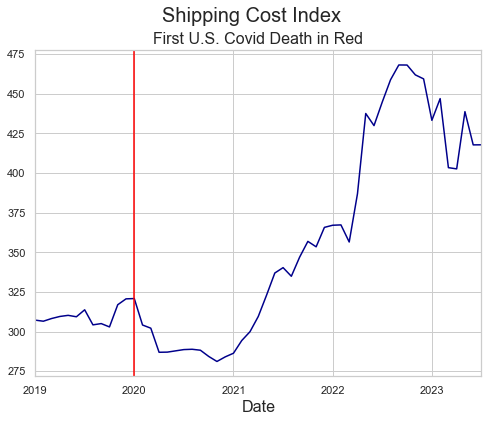

In [15]:
costs = fred.get_series("PCU483111483111", observation_start='2019-01-01').dropna()
costs.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Shipping Cost Index', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
#plt.ylabel('Billions ($)', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

Text(0, 0.5, 'Dollars')

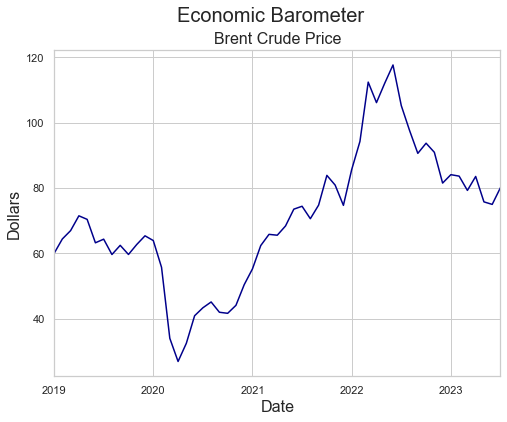

In [16]:
brent = fred.get_series("POILBREUSDM", observation_start='2019-01-01')
brent.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Brent Crude Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Dollars', fontsize=16)

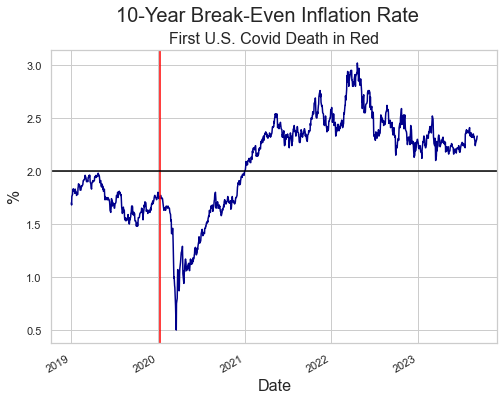

In [17]:
break_even = fred.get_series("T10YIE", observation_start='2019-01-01').dropna()
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year Break-Even Inflation Rate', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")
plt.axhline(2, color="black")

Text(0, 0.5, '%')

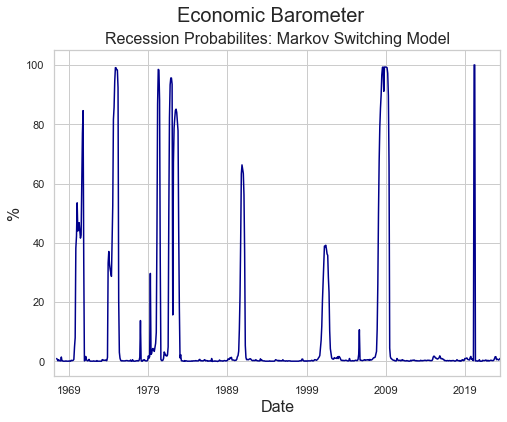

In [18]:
probabilities = fred.get_series("RECPROUSM156N")
probabilities.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Recession Probabilites: Markov Switching Model', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '100 bps')

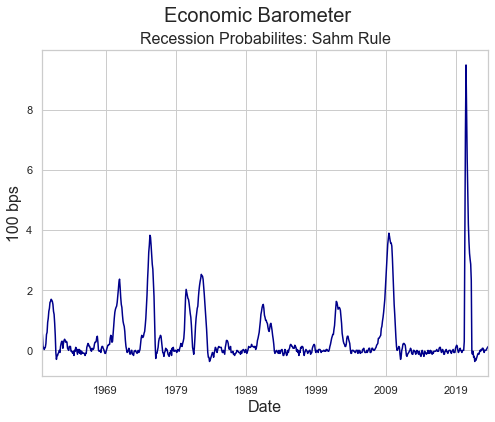

In [19]:
probabilities = fred.get_series("SAHMREALTIME")
probabilities.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Recession Probabilites: Sahm Rule', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('100 bps', fontsize=16)